# The goal


```As a freelance Python developer, you were hired by a crypto-investor to do a Sentiment Analysis on news articles related to cryptocurrencies.```

```Sentiment Analysis is the process of analyzing online pieces of writing, to determine the emotional tone they carry, whether they’re positive, negative, neutral (and even more detailed emotional tones). In simple words, sentiment analysis helps to find the author’s attitude towards a topic.```

```Cryptocurrency values are materially affected by the collective mood, which is often influenced by media coverage.```

#How

```We will use 2 files , read the news from 1)a csv with all the news and 2)use a JSON dictionaire with the emotional value for each word and apply it to the news headline.```


# Chapter 1 - Strings preprocessing


---



 <u>*Goal*: Cleaning strings with extra-whitespaces at the start and end of string or special characters that don't belong to the alphabet.</u>


---



In [7]:
#String exemplo com espaços extra, caracteres espeicais e letras grandes e minisculas.
string_salada_russa = input("Escreve uma frase com caracteres especiais, espaços extra ou letras maiusculas e minusculas..Iremos convertê-la para um formato mais simples.\n\t")

#letters to lowercase and remove trailing and leading whitespaces
clean_string = string_salada_russa.lower().strip()

#loop through the string and remove any character that is not [a-z] and not equal to a space.
for c in clean_string:
  if(c.isalpha() == False and c != " "):
    clean_string = clean_string.replace(c, "")

#split the string into words and join them separating by a space
clean_string = clean_string.split()

print('\n Clean string : ' + str(clean_string))


Escreve uma frase com caracteres especiais, espaços extra ou letras maiusculas e minusculas..Iremos convertê-la para um formato mais simples.
	TeSting How It Works

 Clean string : ['testing', 'how', 'it', 'works']


# Chapter 2 - Pipeline for strings preprocessing



---

<u>*Goal* : Creating 2 functions and combining their result to obtain a substring list without special characters and only lowercase letters.</u>

---




In [8]:
frase = "coiNbasE= leARnS VAluABlE LessOn FrOm faIlEd BUNDle"

#funcao clean : 
#1) recebe 1 string como argumento .
#2) retorna o mesmo string com letras minusculas, sem caracteres especiais e com " ".

def clean_it(string):

  clean_string = string.lower().strip()

  for c in clean_string:
    if(c.isalpha() == False and c != " "):
      clean_string = clean_string.replace(c, "")
  return clean_string

#funcao tokenize:
#1) receives 1 string as argumento
#2) returns a list with the original string divided into substrings. Division delimited by space.
def tokenize(string):
  return string.split(" ", -1)

#funcao complete_clean
#esta funcao combina o resultado das duas funcoes anterioes.
#chamamos a funcao tokenize que recebe o resultado da funcao clean_it
def complete_clean(string):
  cleansed = tokenize(clean_it(string))
  return cleansed

print(complete_clean(frase))


['coinbase', 'learns', 'valuable', 'lesson', 'from', 'failed', 'bundle']


# Chapter 3 - Storing preprocessed strings


---

<u>*Objectivo : Criar uma função que guarde as alteraçoes realizadas na string para a respectiva chave do dicionário em que a notícia se encontra.*</u>

---





In [9]:
#import library
import pandas as pd

#read CSV file and save it into the variable data
data = pd.read_csv('/content/sample_data/crypto_headlines.csv', sep='\t')

#convert the data into a dictionaire where each headline has a different index
lista_de_noticias = data.to_dict('records')

#loop throught the list of dictionaire and add a key containing the tokenized string and the respective sentiment for that headline
for noticia in lista_de_noticias:
  noticia['token'] = complete_clean(noticia['headlinetext']) 
  noticia['sentimento'] = get_sentiment(noticia['token'])


lista_de_noticias



















[{'headlinetext': 'COnSTELlATIon DaG iS nOW liStEd On kucoiN eXC?haNGE',
  'publishdate': 20130504,
  'sentimento': {'anger': 0,
   'anticipation': 0,
   'disgust': 0,
   'fear': 0,
   'joy': 0,
   'negative': 0,
   'positive': 1,
   'sadness': 0,
   'surprise': 0,
   'trust': 1},
  'token': ['constellation',
   'dag',
   'is',
   'now',
   'listed',
   'on',
   'kucoin',
   'exchange']},
 {'headlinetext': 'ItA*lys cRypTOCUrREnCy BITgrAil suspeNds OpERatIOnS',
  'publishdate': 20130511,
  'sentimento': {'anger': 0,
   'anticipation': 0,
   'disgust': 0,
   'fear': 0,
   'joy': 0,
   'negative': 0,
   'positive': 0,
   'sadness': 0,
   'surprise': 0,
   'trust': 0},
  'token': ['italys', 'cryptocurrency', 'bitgrail', 'suspends', 'operations']},
 {'headlinetext': 'THe diffeRENCe bETWEEn sHarEs aNd cRYpToCUrReN€CiES',
  'publishdate': 20130511,
  'sentimento': {'anger': 0,
   'anticipation': 0,
   'disgust': 0,
   'fear': 0,
   'joy': 0,
   'negative': 0,
   'positive': 0,
   'sadness': 0

# Chapter 4 - Scoring and storing headlines sentiment
 

---

<u>*Objectivo : Creating the function to automate the analysis process from the dictionaire. </u>

---



In [10]:
import pandas as pd

#Lemos o ficheiro JSON e atribuimos o seu conteudo à variavel sentimentos.
sentimentos = pd.read_json("/content/sample_data/words_sentiment.json")

#convertemos a variavel num dicionario.
sentiment_dict = sentimentos.to_dict('dict')



#A funcao itera por cada palavra da lista e verifica se ela existe no dicionario.
def get_sentiment(token):
  output = {}

  for word in token:
    if(word in sentiment_dict):
        for key in sentiment_dict[word]:
          if(key not in output):
            output[key] = sentiment_dict[word][key]
          else:
            output[key] += sentiment_dict[word][key]
  return output


# Chapter 5 - Analysing the headlines sentiment

	The sentiment related to crypto-currency was extracted from a total of 190709 news.

	 From that total, 24.47% show a positive feeling towards crypto.
 	Other 17.27% show a feeling of trust and 5.81% show joy.
 	This way 47.55% of the points given to each news headling , show positive feeling toward crypto.

	Negative feelings  like fear , anger and sadness are present on 33.05% of the news
 	The rest 19.4% are feelings of antecipation and surprise.



<BarContainer object of 10 artists>

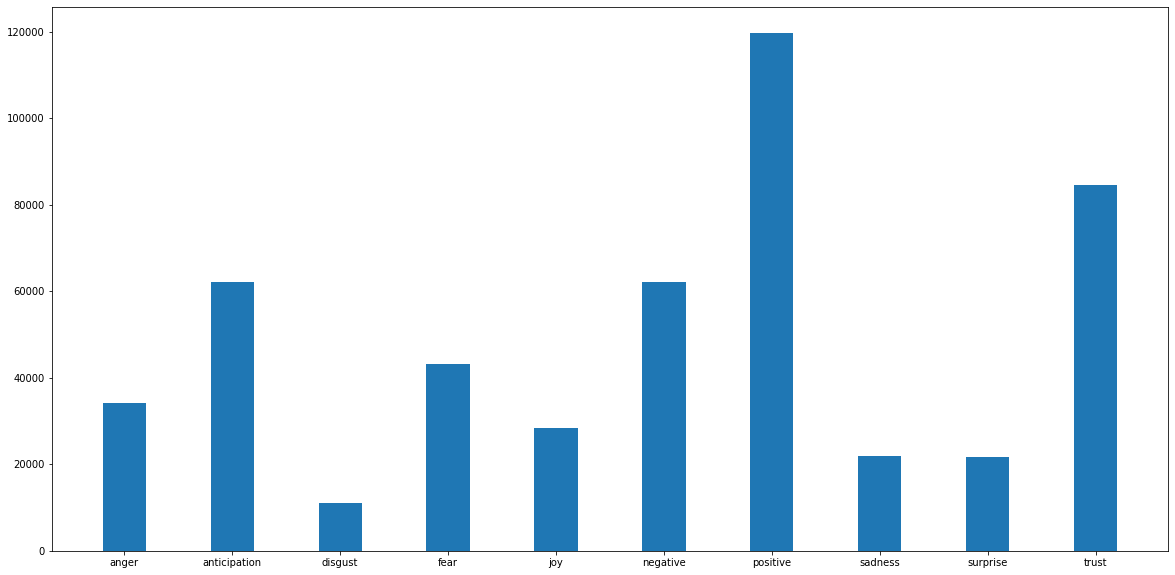

In [11]:
import matplotlib.pyplot as plt


rating_total = 0
i = 0
soma_dos_pontos = {}

for noticia in lista_de_noticias:
  total_de_noticias = i
  if soma_dos_pontos == {}:
    soma_dos_pontos = lista_de_noticias[i]['sentimento']
  else:
    for key in soma_dos_pontos:
      if(lista_de_noticias[i]['sentimento'] != {}):
        soma_dos_pontos[key] += lista_de_noticias[i]['sentimento'][key]
  i += 1



names = list(soma_dos_pontos.keys())
values = list(soma_dos_pontos.values())

for emocao in soma_dos_pontos:
  rating_total += soma_dos_pontos[emocao] 


rating_total 
confiança = round((soma_dos_pontos['trust']/rating_total)*100, 2)
positivo = round((soma_dos_pontos['positive']/rating_total)*100, 2)
alegre = round((soma_dos_pontos['joy']/rating_total)*100, 2)
negativo = round((soma_dos_pontos['negative']/rating_total)*100, 2)
fear = round((soma_dos_pontos['fear']/rating_total)*100, 2)
anger = round((soma_dos_pontos['anger']/rating_total)*100, 2)
sadness = round((soma_dos_pontos['sadness']/rating_total)*100, 2)

sentimentos_positivos = round(confiança + positivo + alegre, 2)
sentimentos_negativos = round(negativo + fear + anger + sadness , 2)


print(f'\tThe sentiment related to crypto-currency was extracted from a total of {total_de_noticias} news.\n')
print(f"\t From that total, {positivo}% show a positive feeling towards crypto.\n \tOther {confiança}% show a feeling of trust and {alegre}% show joy.\n \tThis way {sentimentos_positivos}% of the points given to each news headling , show positive feeling toward crypto.\n")
print(f"\tNegative feelings  like fear , anger and sadness are present on {sentimentos_negativos}% of the news\n \tThe rest {round(100 - sentimentos_positivos - sentimentos_negativos,2)}% are feelings of antecipation and surprise.\n")

plt.figure(figsize=(20, 10)) 
plt.bar(range(len(values)), values, tick_label=names, width=0.4)

# Mission Over - Just playing with matplotlib

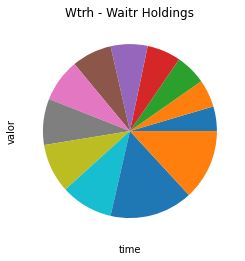

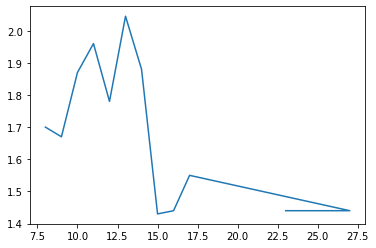

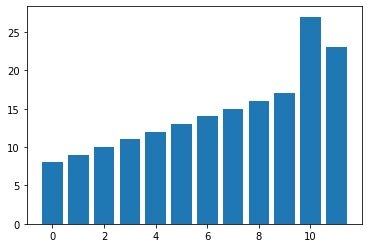

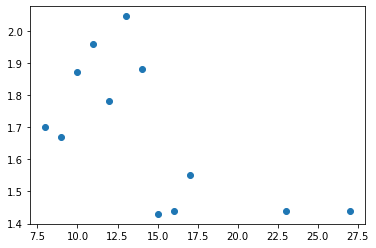

range(0, 12)
range(10, 21)


In [12]:
#import matplotlib a library for plots and charts
import matplotlib.pyplot as plt

x = [8,9,10,11,12,13,14,15,16,17,27, 23 ]

y = [1.7000,1.6700,	1.8700,	1.9600,	1.7800,	2.0450,	1.8800,	1.4300,	1.4400,	1.5500,1.4400,1.4400]

plt.title('Wtrh - Waitr Holdings')
plt.xlabel('time')
plt.ylabel('valor')
plt.pie(x)
plt.show()
plt.plot(x,y)
plt.show()
plt.bar(range(len(x)), x)
plt.show()
plt.scatter(x,y)
plt.show()

print(range(len(x)))

z = range(10,21)

print(z)

